# Taking a Look at the Generated Chord-Trajectory Matrices

1. Move interpreter path up a directory (so we can import the other modules)

In [1]:
import os 
os.chdir('..')

2. load the dataset

In [2]:
from utils.load import load_dataset

In [3]:
ctjs, metadata = load_dataset() # NOTE: you should have to pass any arguments here

Loading matrices: 323it [00:00, 1818.63it/s]
2025-11-03 13:43:39.126 | SUCCESS  | utils.load:load_feature_matrices:36 - Loaded 323 matrices from data/features


3. Inspect

In [4]:
ctjs.head()

,composer,piece_name,matrix,path
0,mozart,mozart_1817_k3752,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/features/mozart/mozart_1817_k3752_traj.npy
1,mozart,mozart_1893_k564_3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/features/mozart/mozart_1893_k564_3_traj.npy
2,mozart,mozart_1818_k3753,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/features/mozart/mozart_1818_k3753_traj.npy
3,mozart,mozart_1793_kv_465_2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/features/mozart/mozart_1793_kv_465_2_traj...
4,mozart,mozart_1819_k3754a,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",data/features/mozart/mozart_1819_k3754a_traj.npy


In [6]:
metadata.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


4. Plot some of them

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

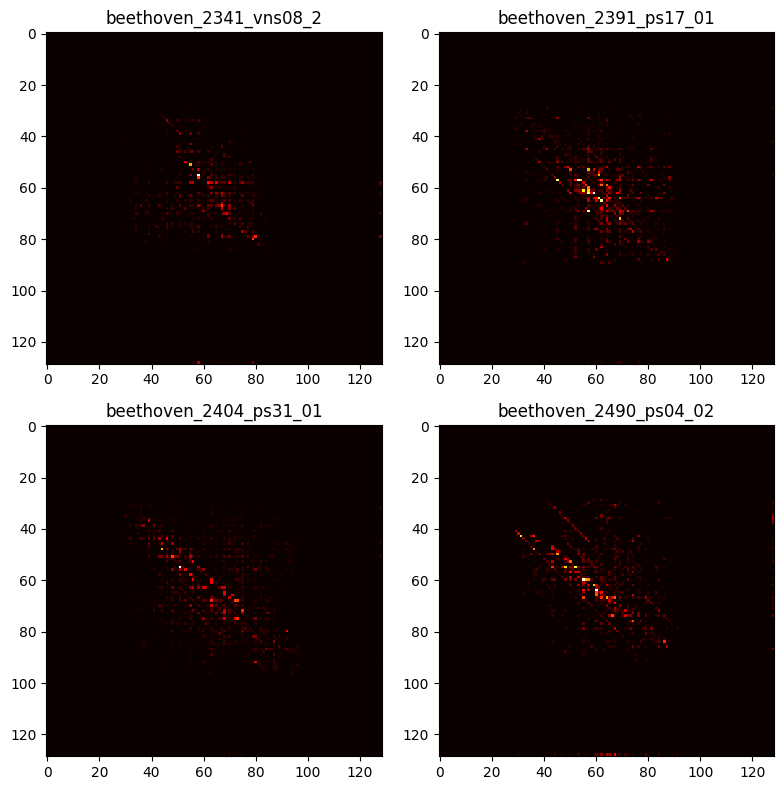

In [9]:
random_indices = np.random.choice(ctjs.shape[0], size=4, replace=False)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, idx in zip(axes.flatten(), random_indices):
    name = ctjs.iloc[idx]['piece_name']
    matrix = ctjs.iloc[idx]['matrix']
    ax.imshow(matrix, cmap='hot', aspect='auto', interpolation='nearest')
    ax.set_title(name)
plt.tight_layout()
plt.show()